In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm
import random


In [10]:
Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]
a=0.2
b=0.3
e=0.03
D=0.01
lambda_ = D*dt/dx**2
mu=e*dt
print(lambda_)
print("Es menor a 0.5")

0.2403403403403404


In [3]:
def ui(x):
    a = random.uniform(0, 0.3)
    return a
def wi(x):
    return 0

In [4]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    u[0,:] = ui(x)
    w = np.zeros((Nt,Nx))
    w[0,:] = wi(x)
    return u,w

In [5]:
u ,w= InitT()

In [6]:
def h1(t):
    return 0.1
def h2(t):
    return 0.2

In [7]:
def GetSolution(u,w):
    
    
    
    for l in tqdm(range(1,len(t)-1)):
        
            
            u[l,0] = h1(t[l])
            u[l,-1] = h2(t[l])
            w[l,0] = 0
            w[l,-1] = 0
            
            for i in range(1,len(x)-1):
                u[l,i] =lambda_*(u[l-1,i+1]-2*u[l-1,i]+u[l-1,i-1])+\
                        dt*(-u[l-1,i]*(u[l-1,i]-a)*(1-u[l-1,i])+w[l-1,i])+u[l-1,i]
               
                w[l,i]=mu*(u[l-1,i]-b*w[l-1,i])+w[l-1,i]
                    
                

In [8]:
GetSolution(u,w)


100%|██████████| 998/998 [00:00<00:00, 5389.62it/s]


<IPython.core.display.Javascript object>


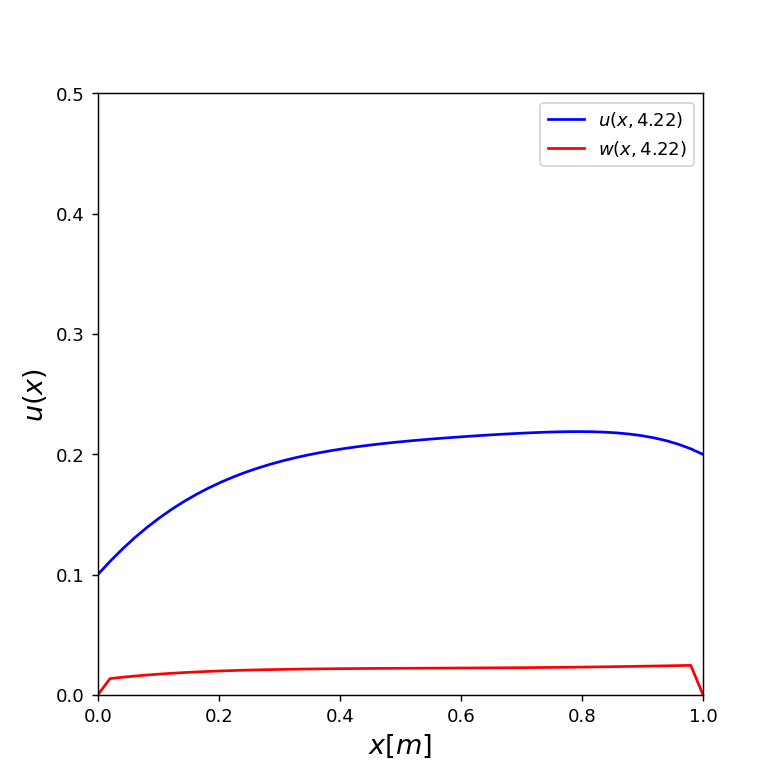

In [9]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.5)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '-' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
   
    plot = plt.legend(loc=0)
    plot = ax.plot(x,w[i,:], '-' ,color='r', label=r'$w(x,%.2f)$' %(t[i]))
  
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

Bueno, la neurona se activa en el segundo 8.30, donde la primera parte en llegar a ese potencial no es el centro de la función, está más allá del centro hacia la derecha, ya que la condiciones iniciales hacen que la parte derecha suba primero. El tiempo también depende del potencial inicial del problema, si el potencial de inicio es bajo, llegará más lento que si es mas alto el potencial.